# Problèmes de machine learning

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(last_level=3)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Dans les exemples qui suivent :

* $e(X,Y)$ est une fonction d'erreur
* $\Theta$ et un jeu de coefficients
* $f(\Theta, X_i)$ la prédiction pour l'observation $i$, $\Theta$ représente les paramètres
* $(X_i, Y_i)$ est un jeu de données

**Note**

Les exemples suivants ne divisent pas les données en base d'apprentissage / base de test. Les modèles sont appris et testés sur les mêmes données ce qu'on ne fait jamais en pratique. La résolution des problèmes d'optimisation suppose que les données sont homogènes (elles suivent la même lois) et indépendantes.

## Supervisés

### Regréssion

In [ ]:
add_notebook_menu(menu_id="reg", first_level=3, last_level=4, keep_item=0)

#### données 

$(X_i, Y_i)$, avec $X_i \in \mathbb{R}$ et $Y_i \in \mathbb{R}$.

#### sortie

$\hat{Y_i} \in \mathbb{R}$, $\hat{Y_i} = f(\Theta, X_i)$

#### optimisation

$$
\min_\Theta \sum_i e(Y_i, f(\Theta, X_i))
$$

Dans le cas standard, la fonction d'erreur est quadratique : $\min_\Theta \sum_i (Y_i - f(\Theta, X_i))^2$ et correspond au problème de modélisation $Y \sim f(\Theta, X_i) + \epsilon$ avec $\epsilon$ bruit gaussien.

#### évaluation

$$
r^2 = 1 - \frac{ \sum_i (Y_i - f(\Theta, X_i))^2 } { \sum_i (Y_i - \bar{Y})^2 } \leqslant 1 \text{ ou } 1 - \frac{ \sum_i e(Y_i, f(\Theta, X_i) } { \sum_i e(Y_i, \hat{Y}) }
$$

#### exemple

In [ ]:
import numpy.random
X = numpy.random.random((100, 1))
xx = numpy.random.normal(size=(100, 1)) / 10
Y = X*X + xx

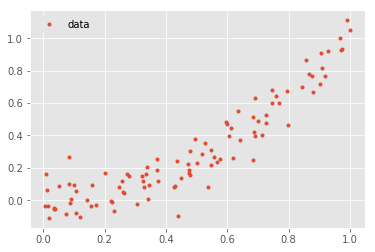

In [ ]:
fig, ax = plt.subplots()
ax.plot(X, Y, ".", label="data")
ax.legend()

In [ ]:
# model 1
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(X, Y)
Yp = clr.predict(X)

In [ ]:
# model 2
from sklearn.tree import DecisionTreeRegressor
clr2 = DecisionTreeRegressor(max_depth=4)
clr2.fit(X, Y)
Yp2 = clr2.predict(X)

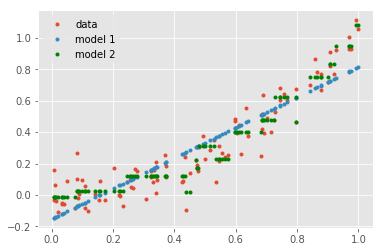

In [ ]:
fig, ax = plt.subplots()
ax.plot(X, Y, ".", label="data")
ax.plot(X, Yp, ".", label="model 1")
ax.plot(X, Yp2, "g.", label="model 2")
ax.legend()

#### graphe erreur XY

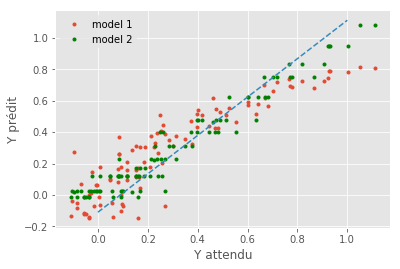

In [ ]:
fig, ax = plt.subplots()
ax.plot(Y, Yp, ".", label="model 1")
ax.plot(Y, Yp2, "g.", label="model 2")
mm = [numpy.min(Y), numpy.max(Y)]
ax.plot(mm, "--")
ax.set_xlabel("Y attendu")
ax.set_ylabel("Y prédit")
ax.legend()

Plus ce nuage est confondu avec la droite, plus il est performant. S'il y a trop de points, on peut trier les erreurs par ordre croissant :

In [ ]:
err1 = ((Y - Yp)).reshape((len(Y),))
err1.sort()
err2 = ((Y - Yp2.reshape((len(Y), 1)))).reshape((len(Y),))
err2.sort()

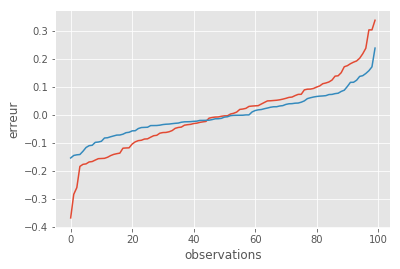

In [ ]:
fig, ax = plt.subplots()
ax.plot(err1, label="model 1")
ax.plot(err2, label="model 2")
ax.set_xlabel("observations")
ax.set_ylabel("erreur")

### Classification binaire

In [ ]:
add_notebook_menu(menu_id="classif", first_level=3, last_level=4, keep_item=1)

#### données

$(X_i, Y_i)$, avec $X_i \in \mathbb{R}$ et $Y_i \in \{0,1\}$.

#### sortie

$(c_i, p_i^c)$ avec $c_i \in \{0,1\}$ la classe prédite et $p_i^c \in [0,1]$ la probabilité d'appartenance à la classe $c$ ou score de confiance. $p_i^1 = f(\Theta, X_i)$ et $p_i^0 = 1 - p_i^1$.

#### optmisation

Le problème d'optimisation dépend du modèle. On souhaite optimiser $f(\Theta,X_i) = P(Y=1 | X_i, \Theta)$, la probabilité que $X$ appartienne la la classe 1.


* [vraisemblance](https://fr.wikipedia.org/wiki/Rapport_de_vraisemblance) (régression logisitique) : $\max_\Theta \ln \frac{ P(Y=1| X) } {P(Y=0 | X)}$
* distance de [Kullback-Leiber](https://fr.wikipedia.org/wiki/Divergence_de_Kullback-Leibler) (arbre) : $\max_\Theta \sum_i - Y_i \ln p_i^1 -   (1-Y_i) \ln (1-p_i^1)$

#### évaluation

* matrice de confusion
* rappel, précision

#### exemple

In [ ]:
import numpy.random
X = numpy.random.normal(size=(100, 2))
Y = numpy.random.randint(2, size=(100, ))
X[Y==1,0] += 1.2
X[Y==1,1] += 1.2

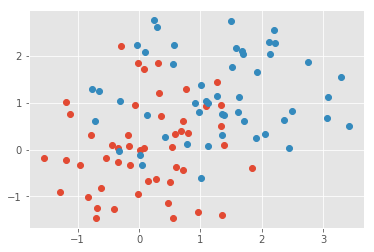

In [ ]:
fix, ax = plt.subplots()
ax.plot(X[Y==0,0], X[Y==0,1], "o")
ax.plot(X[Y==1,0], X[Y==1,1], "o")

In [ ]:
# model 1
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
clr.fit(X, Y)
Yp = clr.predict(X)

In [ ]:
# model 1
from sklearn.tree import DecisionTreeClassifier
clr2 = DecisionTreeClassifier(max_depth=3)
clr2.fit(X, Y)
Yp2 = clr2.predict(X)

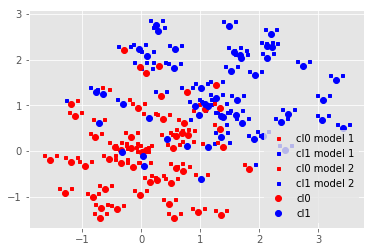

In [ ]:
fig, ax = plt.subplots()
ax.plot(X[Yp==0,0]+0.1, X[Yp==0,1]+0.1, "rs", label="cl0 model 1", ms=3)
ax.plot(X[Yp==1,0]+0.1, X[Yp==1,1]+0.1, "bs", label="cl1 model 1", ms=3)
ax.plot(X[Yp2==0,0]-0.1, X[Yp2==0,1]+0.1, "rs", label="cl0 model 2", ms=3)
ax.plot(X[Yp2==1,0]-0.1, X[Yp2==1,1]+0.1, "bs", label="cl1 model 2", ms=3)
ax.plot(X[Y==0,0], X[Y==0,1], "ro", label="cl0")
ax.plot(X[Y==1,0], X[Y==1,1], "bo", label="cl1")
ax.legend()

#### graphe erreur AUC

In [ ]:
from sklearn.metrics import roc_curve, auc

# model 1
Ypr = clr.predict_proba(X)
fpr, tpr, thresholds = roc_curve(Y, Ypr[:,1]) # on choisit la classe 1

In [ ]:
# model 2
Ypr2 = clr2.predict_proba(X)
fpr2, tpr2, thresholds2 = roc_curve(Y, Ypr2[:,1]) # on choisit la classe 1

In [ ]:
auc(fpr, tpr), auc(fpr2, tpr2)

(0.88039999999999996, 0.90000000000000002)

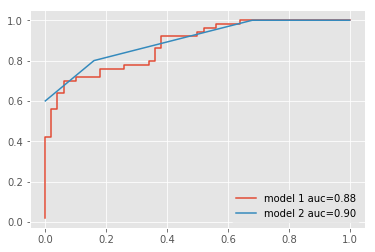

In [ ]:
fix, ax = plt.subplots()
ax.plot(fpr, tpr, label="model 1 auc=%0.2f" % auc(fpr, tpr))
ax.plot(fpr2, tpr2, label="model 2 auc=%0.2f" % auc(fpr2, tpr2))
ax.legend()

#### matrice de confusation

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, Yp)

array([[37, 13],
       [11, 39]])

In [ ]:
confusion_matrix(Y, Yp2)

array([[42,  8],
       [10, 40]])

### Plusieurs dimension

#### Régression 

$Y_i \in \mathbb{Y^p}$

Addition des erreurs sur les différentes dimensions

#### Classification

$Y_i \in E$ où $E$ est un ensemble sur lequel il n'y a pas de relation d'ordre.

On transforme le problème en plusieurs problèmes de classification binaire.

* [un contre tous](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest)
* [un contre un](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest)

### Ranking

In [ ]:
add_notebook_menu(menu_id="rank", first_level=3, last_level=4, keep_item=3)

#### données

$(G_i, X_i, Y_i)$, avec $X_i \in \mathbb{R}$ et $Y_i \in \mathbb{N}$.

$G_i$ est un identifiant qui permet de regroupes les observations ensemble. Au sein d'un groupe, $Y_i$ détermine l'ordre dans lequel les observations doivent être triées.

#### sortie

$S_i$, ce socre permet de trier les observations au sein d'un groupe.

#### optimisation

Trois approches

* score : on émet l'hypothèse qu'il existe un score qui permet de trier les éléments entre eux, la connaissance du groupe $G_i$ est superflu, le problème de ranking devient un problème de régression où on cherche à apprendre le score.
* [pair-wise](https://en.wikipedia.org/wiki/Learning_to_rank#Pairwise_approach) : le score n'est pas connu, tout ce qu'on sait faire est d'exprimer une préférence entre les éléments $(G_i=g,X_i)$ et $(G_j=g,X_j)$. On transforme le problème le problème de ranking en un problème de classification binaire, pour chaque chaque pair d'oboservations au sein du même groupe, on aprend la préférence.

#### évaluation

corrélation entre les positions attendues et prédites au sein du même groupe d'observations

## Non supervisés

### Clustering

Principales différences entre algorithmes :

* espace veectoriel / espace métrique (distance uniquement)
* nombre de clusters fixés à l'avance ou déterminé en cours de route
* coût

![image](http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

### PCA (whitening)

![projection](http://scikit-learn.org/stable/_images/sphx_glr_plot_pca_iris_001.png)

### Projection, Manifolds

![manifolds](http://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_001.png)

## Nouveaux domaines

### Systèmes de recommandations

* [factorisation de matrice](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization)
* [collaborative filtering](https://fr.wikipedia.org/wiki/Filtrage_collaboratif)
* [décomposition de tenseur](https://en.wikipedia.org/wiki/Higher-order_singular_value_decomposition)

### Deep learning

* réseaux de neurones
* reconnaissance d'image, de paroles
* traduction automatique

### Sequence learning

* reinforcement learning
* RNN, LSTM
* Markov Models

### Algorithme du bandit

* exploration / exploitation
* utilisé dans internet

## Machine learning et informatique

### Parallélisation des calculs

* CPU, GPU, cluster
* synchrone, asynchrone

### In memory training / out of memory training

* accès aléatoire
* accès séquentiel

### Pipeline

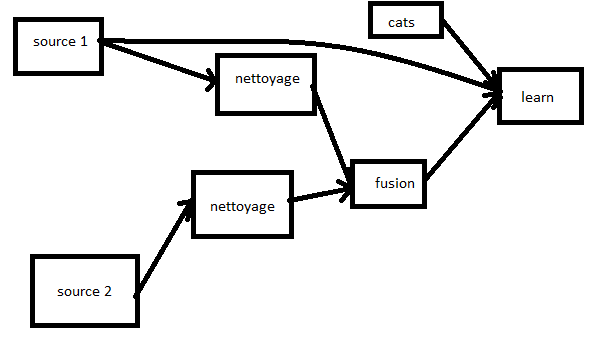

In [ ]:
from pyquickhelper.helpgen import NbImage
NbImage("pipeline.png")

## Exercice 1 : cas spécifique du multi class

La plupart des modèles ne savant pas gérer le cas multi-class, seulement le cas de la classification binaire.

* [One vs Rest](http://scikit-learn.org/stable/modules/multiclass.html#one-vs-the-rest)
* [One vs One](http://scikit-learn.org/stable/modules/multiclass.html#one-vs-one)
* Et si on transformat le label en une variable...

Il faut comparer ces trosi approches.

## Exercice 2 : ranking

Résoudre un problème de ranking.